[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/theochem/grid/blob/master/examples/One_dimensional_grids.ipynb)

# One-Dimensional and Radial Grids

Grid supports several quadrature rules for one-dimensional grids, most of them in the [-1, 1] interval, within the [OneDGrid](https://grid.qcdevs.org/pyapi/grid.basegrid.html#grid.basegrid.OneDGrid) module.

### Example: Visualize One-Dimensional Grid Points

Here, we showcase some of the quadrature rules available each with a unique set of points. Click [here](https://grid.qcdevs.org/pyapi/grid.onedgrid.html) for a full list of one-dimensional grid classes and [here](https://grid.qcdevs.org/onedgrids.html#one-dimensional-grids) for a condensed table containing most of the popular grids.

In [1]:
from grid.onedgrid import *

# Make several 1-dimensional grids for a given number of points
npoints = 31

grids = [
    GaussChebyshev(npoints),
    GaussLegendre(npoints),
    TanhSinh(npoints),
    Simpson(npoints),
    Trapezoidal(npoints),
]

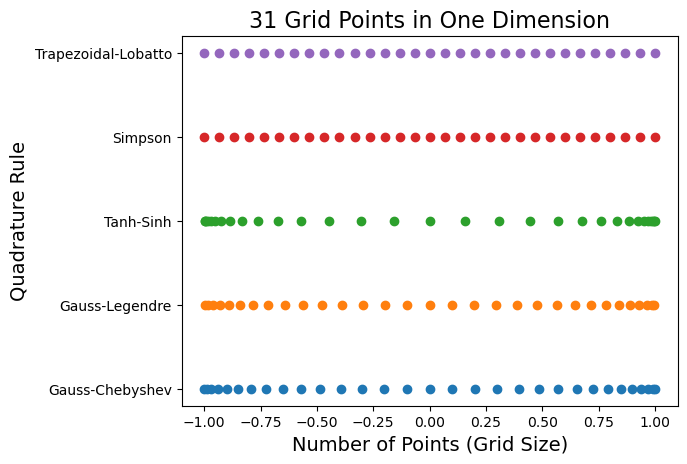

In [2]:
import numpy as np
import matplotlib.pyplot as plt

names = []
for i, oned in enumerate(grids):
    plt.scatter(oned.points, np.repeat(i + 1, oned.size), marker="o")
    names.append(oned.name)

# set the y-ticks to be the 1D grid names, and set labels
plt.title(f"{npoints} Grid Points in One Dimension", fontsize=16)
plt.yticks(np.arange(1, len(grids) + 1), names)
plt.xlabel("Number of Points (Grid Size)", fontsize=14)
plt.ylabel("Quadrature Rule", fontsize=14)
plt.show()

### Example: Integration of One-Variable Function on $[-1, 1]$

The one-dimensional grids can accurately integrate one-variable functions over an interval (defined by their domain), even with a small number of points. Here, we numerically compute the integral below and compute the relative percent error. The analytical value of this integral is $\pi/2$.

$$ \int_{-1}^1 \sqrt{1 - x^2} dx \approx \sum_{i=0}^{N-1} w_i \sqrt{1 - x_i^2} $$


Integral of sqrt(1-x^2) from -1 to 1:
 1.57079633 from Analytical integration (which is equal to pi/2)
 1.57079633 from Gauss-Chebyshev integration
 1.57082270 from Gauss-Legendre integration
 1.57067045 from Tanh-Sinh integration
 1.56683246 from Simpson integration
 1.56069571 from Trapezoidal-Lobatto integration


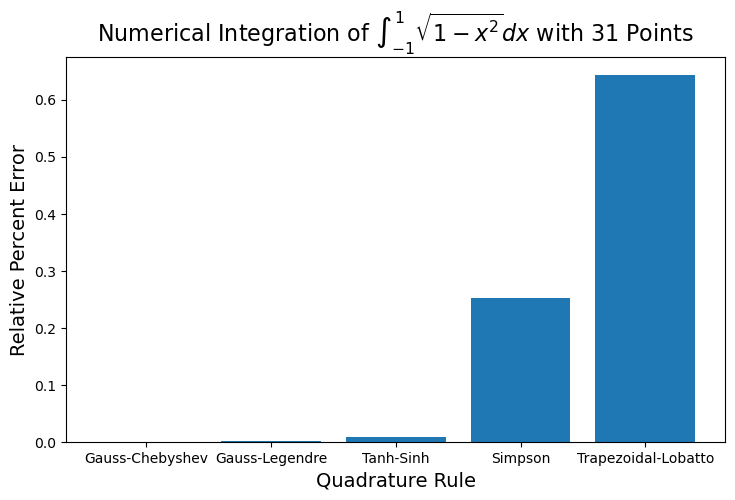

In [3]:
import numpy as np

# define the function to integrate
function = lambda x: np.sqrt(1 - x**2)

print("Integral of sqrt(1-x^2) from -1 to 1:")
print(f"{np.pi / 2: .8f} from Analytical integration (which is equal to pi/2)")

names = []
error_relative = []
for oned in grids:
    # integrate the function evaluated on the grid points
    integral = oned.integrate(function(oned.points))
    print(f"{integral: .8f} from {oned.name} integration")
    error_relative.append(np.abs(integral - np.pi / 2) / (np.pi / 2) * 100)
    names.append(oned.name)

# plot the relative error as columns graph
plt.figure(figsize=(8.5, 5))
plt.bar(names, error_relative)
title = r"Numerical Integration of $\int_{-1}^1 \sqrt{1-x^2} dx$ with " + str(npoints) + " Points"
plt.title(title, fontsize=16)
plt.xlabel("Quadrature Rule", fontsize=14)
plt.ylabel("Relative Percent Error", fontsize=14)
plt.show()

Changing the number of grid points increases the accuracy of each quadrature. Here we show how the relative integration error converges to zero when increasing the number of points.


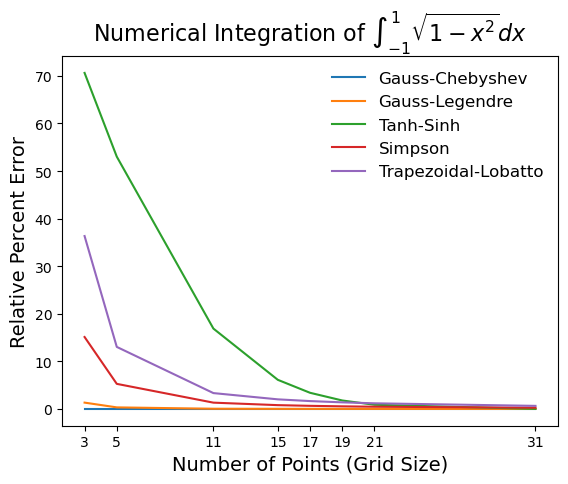

In [4]:
npoints = [3, 5, 11, 15, 17, 19, 21, 31]
grid_classes = [GaussChebyshev, GaussLegendre, TanhSinh, Simpson, Trapezoidal]

for grid_class in grid_classes:
    errors = []
    for npoint in npoints:
        # make 1-dimensional grid for the given number of points
        oned = grid_class(npoint)
        # compute relative percent error of integration
        integral = oned.integrate(function(oned.points))
        errors.append(np.abs(integral - np.pi / 2) / (np.pi / 2) * 100)
    # plot relative percent error vs. number of grid points
    plt.plot(npoints, errors, label=oned.name)

plt.legend(frameon=False, fontsize=12)
plt.title(r"Numerical Integration of $\int_{-1}^1 \sqrt{1-x^2} dx$", fontsize=16)
plt.xlabel("Number of Points (Grid Size)", fontsize=14)
plt.ylabel("Relative Percent Error", fontsize=14)
plt.xticks(npoints)
plt.show()

## Radial Grid: Transformation of 1D-Integration Intervals

Generally, areas where the integrand changes more rapidly demand a denser concentration of points. So, the $[-1, 1]$ interval is not suitable for most applications encountered in quantum chemistry, where the integrals are usually performed on $[0,\infty)$ domain. [Grid](https://github.com/theochem/grid) supports several transformations of the one-dimensional grids to other intervals. Some of these transformations have a parameter that can be used to control the density of points across different ranges of the new interval. Click [here](https://grid.qcdevs.org/pyapi/grid.rtransform.html) for a full list of radial transformations and [here](https://grid.qcdevs.org/radial_transf.html) for a condensed table with explicit formulas.

### Visualize Radial Grid Points

Here we visualize the OneDGrid points for different quadrature rules after a Becke transformation.


/var/folders/wk/kmp6fyrn3396qjpx40d2qk600000gn/T/ipykernel_75060/2869605059.py:18: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax2.set_xlim(0, 2500)


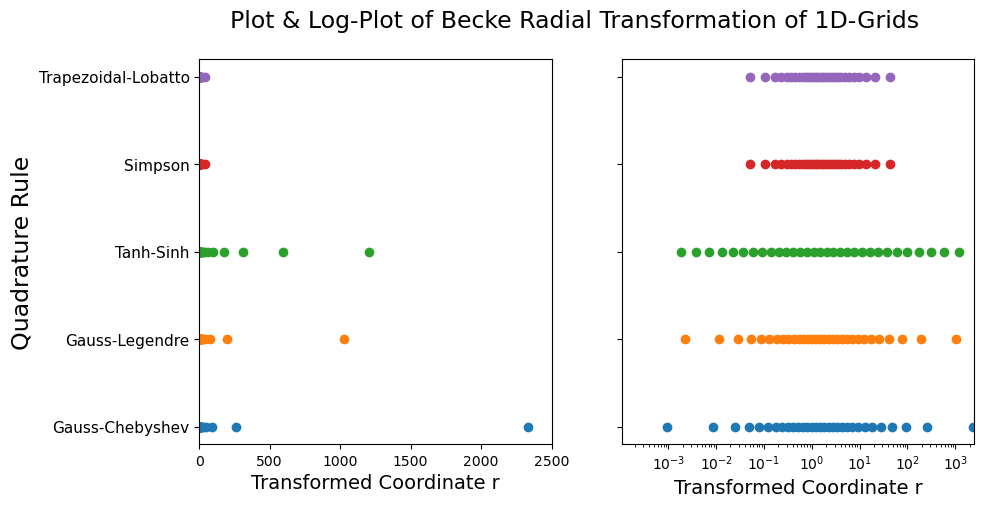

In [8]:
from grid.rtransform import BeckeRTransform

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
names = []
for i, oned in enumerate(grids):
    # Becke R-transform (goes from 0 to \infty) to transform 1D-grid
    rgrid = BeckeRTransform(0.0, R=1.5).transform_1d_grid(oned)
    # plot radial grid points for each transformed 1D-grid
    ax1.scatter(rgrid.points, np.repeat(i + 1, rgrid.size), marker="o")
    # plot log plot of radial grid points
    ax2.semilogx(rgrid.points, np.repeat(i + 1, rgrid.size), marker="o", linestyle="")
    names.append(oned.name)

# set the ticks, labels, and title
plt.suptitle("Plot & Log-Plot of Becke Radial Transformation of 1D-Grids", fontsize=17)
ax1.set_yticks(np.arange(1, len(grids) + 1), names, fontsize=11)
ax1.set_xlim(0, 2500)
ax2.set_xlim(1.0e-4, 2500)
ax1.set_xlabel("Transformed Coordinate r", fontsize=14)
ax2.set_xlabel("Transformed Coordinate r", fontsize=14)
ax1.set_ylabel("Quadrature Rule", fontsize=17)
plt.show()

### Example: Integration of One-Variable Function on $[0, \infty]$

This transformation tends to concentrate the points close to the origin. Because of this, it is usually used for defining radial grids for atoms where the function to integrate is rapidly varying close to the origin (e.g. the electron density is more concentrated close to the nucleus). Here, we integrate (which has the exact value of 2.0):

$$ \int_0^\infty x^2 e^{-x} dx $$


In [6]:
print("Integration of r^2 * exp(-r) from 0 to infinity:")
print(f"{2.0: .6f} Analytical integration")

# Make several 1-dimensional grids for a given number of points
npoints = 21
grids = [
    GaussChebyshev(npoints),
    GaussLegendre(npoints),
    TanhSinh(npoints),
    Simpson(npoints),
    Trapezoidal(npoints),
]

for oned in grids:
    rgrid = BeckeRTransform(0.0, R=1.5).transform_1d_grid(oned)
    x = rgrid.points
    func_vals = x**2 * np.exp(-x)
    integral = rgrid.integrate(func_vals)
    print(f"{integral: .6f} from BeckeRTransform radial grid of {oned.name}")

Integration of r^2 * exp(-r) from 0 to infinity:
 2.000000 Analytical integration
 2.000003 from BeckeRTransform radial grid of Gauss-Chebyshev
 1.999996 from BeckeRTransform radial grid of Gauss-Legendre
 1.999993 from BeckeRTransform radial grid of Tanh-Sinh
 1.998949 from BeckeRTransform radial grid of Simpson
 2.000006 from BeckeRTransform radial grid of Trapezoidal-Lobatto


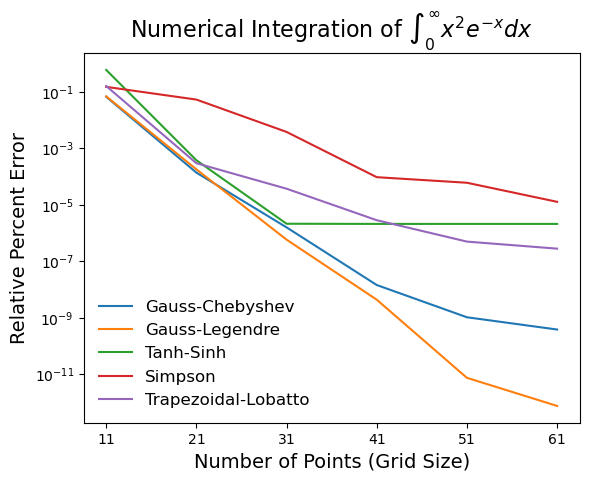

In [12]:
npoints = [11, 21, 31, 41, 51, 61]
grid_classes = [GaussChebyshev, GaussLegendre, TanhSinh, Simpson, Trapezoidal]

for grid_class in grid_classes:
    errors = []
    for npoint in npoints:
        # make 1-dimensional grid for the given number of points
        oned = grid_class(npoint)
        rgrid = BeckeRTransform(0.0, R=1.5).transform_1d_grid(oned)
        # calculate x^2 e^-x
        x = rgrid.points
        func_vals = x**2.0 * np.exp(-x)
        # compute relative percent error of integration
        integral = rgrid.integrate(func_vals)
        errors.append(np.abs(integral - 2.0) / 2.0 * 100)
    # plot relative percent error vs. number of grid points
    plt.semilogy(npoints, errors, label=oned.name)

plt.legend(frameon=False, fontsize=12)
plt.title(r"Numerical Integration of $\int_0^\infty x^2 e^{-x}dx$", fontsize=16)
plt.xlabel("Number of Points (Grid Size)", fontsize=14)
plt.ylabel("Relative Percent Error", fontsize=14)
plt.xticks(npoints)
plt.show()